# The study for HMC BIW PROJECT  

## M/L is used to estimate the value with parameters.  
## 


In [1]:
# import libraries
from __future__ import absolute_import, division, print_function, unicode_literals

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# other utiles
import matplotlib.pyplot as plt
from  IPython import display
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib

In [2]:
# check the tensorflow version
print(tf.__version__)

2.1.0


In [3]:
# read training dataset
dataset_org = pd.read_csv(r'F:\CON_2019_HMC_PGD-MINESET\Second_model\Case2\whe_ro_to_send\New_Testing_parameters_high_all.csv')

# make an instance for dataset
dataset = dataset_org
# extract the columns from the dataset
column_names = dataset.columns

lst_max = (dataset.max(0).tail(5))
lst_min = (dataset.min(0).tail(5))

min_Area = lst_min[0]
max_Area = lst_max[0]

min_Head = lst_min[1] 
max_Head = lst_max[1]

min_Shou = lst_min[2]
max_Shou = lst_max[2]

min_Abdo = lst_min[3]
max_Abdo = lst_max[3]

min_Pelv = lst_min[4]
max_Pelv = lst_max[4]

dataset.head()

,Unnamed: 0,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,...,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,Area,Head,Shou,Abdo,Pelv
0,1,900,900,900,900,900,900,900,900,900,...,900,900,900,900,900,102.095084,58.602119,86.404773,95.057875,75.908791
1,2,1180,1230,1080,1050,613,1220,624,657,1040,...,1270,621,709,1220,945,1426.195610,58.248111,85.708525,93.465045,74.120131
2,3,1300,830,1200,863,1030,673,769,980,999,...,1220,700,634,909,571,1084.181378,59.917818,84.805603,91.276092,69.551377
3,4,1030,875,720,763,831,788,1250,925,937,...,955,837,1310,586,488,832.286194,59.700959,85.056978,93.349577,72.948480
4,5,660,1150,1090,908,1050,895,502,1230,616,...,542,496,1070,656,977,248.448073,58.390528,85.937332,92.114906,70.526969


# 1. M/L model for Area

In [4]:
# Define Functions
model = None
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

def build_model():
    model = keras.Sequential([
      layers.Dense(56, activation='relu', 
                   kernel_regularizer=keras.regularizers.l2(0.01), 
                   input_shape=[len(train_dataset.keys())]),
      layers.Dense(56, activation='relu', 
                   kernel_regularizer=keras.regularizers.l2(0.001)
                   ), 
      layers.Dense(1)
      ])
    #optimizer = tf.keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    #optimizer = tf.keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
    optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    #optimizer = tf.keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
    
    model.compile(
      loss='mae',
      optimizer=optimizer,
      # 'mae', 'mse', 'mape',
      metrics=['mae'])

    return model  

# Training
def training(EPOCHS=1000, model=model):
    # EPOCHS = 1000
    # print("% : Training : start", model)
    history = model.fit(
                          normed_train_data, train_labels,
                          epochs=EPOCHS, validation_split = 0.2, verbose=0,
                          callbacks=[tfdocs.modeling.EpochDots()]
                          )
    # print("% : Training : end", model)
    # early stop by val_mae
    early_stop = keras.callbacks.EarlyStopping(monitor='mae', patience=10)
    early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])
    test_mae_score, test_mae_score = model.evaluate(  normed_test_data, test_labels  )                    
    return model, history, early_history        

In [5]:
dataset = pd.read_csv(r'F:\CON_2019_HMC_PGD-MINESET\Second_model\Case2\whe_ro_to_send\New_Testing_parameters_high_all.csv')
lst_pop = [ "Area", "Head", "Shou", "Abdo", "Pelv" ]
target = "Area"
for pop in lst_pop:
    if pop == target:
        print(target)
        pass
    else:
        dataset.pop(pop)

train_dataset = dataset.sample(frac=0.7)
test_dataset  = dataset.drop(train_dataset.index)	

# make an instance for dataframe as "train_stats"
train_stats = train_dataset.describe()
# delete "Area" column from "train_stats"
train_stats.pop( target )

train_stats = train_stats.transpose()
# train_stats.tail()

# make instances for dataset without the QoI
train_labels = train_dataset.pop( target )
test_labels  =  test_dataset.pop( target )    

normed_train_data = norm( train_dataset )
normed_test_data  = norm( test_dataset  )

# create the model instance 
EPOCHS = 1000
model_Area = build_model()
model_Area, model_Area_history, model_Area_early_history = training(EPOCHS, model=model_Area)



Area

Epoch: 0, loss:1011.1585,  mae:1010.5456,  val_loss:1033.5098,  val_mae:1032.8718,  
....................................................................................................
Epoch: 100, loss:216.4167,  mae:211.9133,  val_loss:377.4328,  val_mae:372.9225,  
....................................................................................................
Epoch: 200, loss:91.0847,  mae:85.4845,  val_loss:323.4307,  val_mae:317.8307,  
....................................................................................................
Epoch: 300, loss:54.9615,  mae:48.8242,  val_loss:328.9303,  val_mae:322.7892,  
....................................................................................................
Epoch: 400, loss:40.1545,  mae:33.6906,  val_loss:335.9374,  val_mae:329.4719,  
....................................................................................................
Epoch: 500, loss:32.2044,  mae:25.5523,  val_loss:345.7695,  val_mae:339.1115,

Text(0, 0.5, 'MAE [Area]')

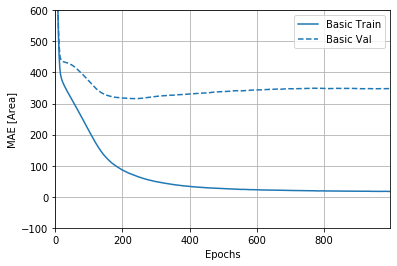

In [6]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': model_Area_history}, metric = "mae")
plt.ylim([-100, 600])
plt.ylabel('MAE [Area]')

Text(0, 0.5, 'MAE [Area]')

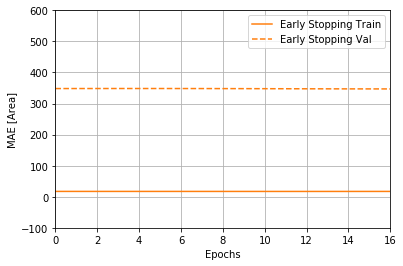

In [7]:
plotter.plot({'Early Stopping': model_Area_early_history}, metric = "mae")
plt.ylim([-100, 600])
plt.ylabel('MAE [Area]')

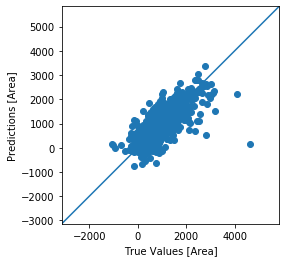

In [8]:
# model evaluate by curve
test_predictions = model_Area.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Area]')
plt.ylabel('Predictions [Area]')
lims = [lst_min[0]-100, lst_max[0]+100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [9]:
dataset = pd.read_csv(r'F:\CON_2019_HMC_PGD-MINESET\Second_model\Case2\whe_ro_to_send\New_Testing_parameters_high_all.csv')
lst_pop = [ "Area", "Head", "Shou", "Abdo", "Pelv" ]
target = "Head"
for pop in lst_pop:
    if pop == target:
        print(target)
        pass
    else:
        dataset.pop(pop)

train_dataset = dataset.sample(frac=0.7)
test_dataset = dataset.drop(train_dataset.index)	

# make an instance for dataframe as "train_stats"
train_stats = train_dataset.describe()
# delete "Area" column from "train_stats"
train_stats.pop( target )

train_stats = train_stats.transpose()
# train_stats.tail()

# make instances for dataset without the QoI
train_labels = train_dataset.pop( target )
test_labels  =  test_dataset.pop( target )    

normed_train_data = norm( train_dataset )
normed_test_data  = norm( test_dataset  )

# create the model instance 
EPOCHS = 5000
model_Head = build_model()
model_Head, model_Head_history, model_Head_early_history = training(EPOCHS, model=model_Head)



Head

Epoch: 0, loss:55.2871,  mae:54.6558,  val_loss:50.3530,  val_mae:49.6825,  
....................................................................................................
Epoch: 100, loss:1.1072,  mae:0.5053,  val_loss:3.0257,  val_mae:2.4245,  
....................................................................................................
Epoch: 200, loss:0.8552,  mae:0.4470,  val_loss:2.4360,  val_mae:2.0283,  
....................................................................................................
Epoch: 300, loss:0.7516,  mae:0.4525,  val_loss:1.9182,  val_mae:1.6196,  
....................................................................................................
Epoch: 400, loss:0.6286,  mae:0.4016,  val_loss:1.4949,  val_mae:1.2684,  
....................................................................................................
Epoch: 500, loss:0.5741,  mae:0.3986,  val_loss:1.1163,  val_mae:0.9409,  
.....................................

Text(0, 0.5, 'MAE [Displacement]')

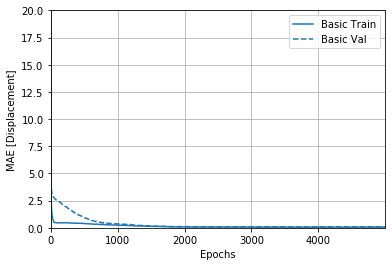

In [10]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': model_Head_history}, metric = "mae")
plt.ylim([0, 20])
plt.ylabel('MAE [Displacement]')

Text(0, 0.5, 'MAE [Displacement]')

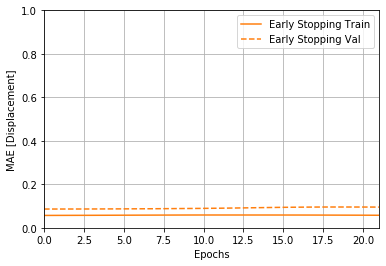

In [11]:
plotter.plot({'Early Stopping': model_Head_early_history}, metric = "mae")
plt.ylim([0, 1])
plt.ylabel('MAE [Displacement]')

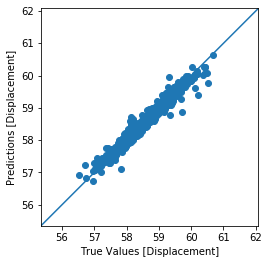

In [12]:
# model evaluate by curve
test_predictions = model_Head.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Displacement]')
plt.ylabel('Predictions [Displacement]')
lims = [lst_min[1]-1, lst_max[1]+1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [13]:
dataset = pd.read_csv(r'F:\CON_2019_HMC_PGD-MINESET\Second_model\Case2\whe_ro_to_send\New_Testing_parameters_high_all.csv')
lst_pop = [ "Area", "Head", "Shou", "Abdo", "Pelv" ]
target = "Shou"
for pop in lst_pop:
    if pop == target:
        print(target)
        pass
    else:
        dataset.pop(pop)

train_dataset = dataset.sample(frac=0.7)
test_dataset = dataset.drop(train_dataset.index)	

# make an instance for dataframe as "train_stats"
train_stats = train_dataset.describe()
# delete "Area" column from "train_stats"
train_stats.pop( target )

train_stats = train_stats.transpose()
# train_stats.tail()

# make instances for dataset without the QoI
train_labels = train_dataset.pop( target )
test_labels  =  test_dataset.pop( target )    

normed_train_data = norm( train_dataset )
normed_test_data  = norm( test_dataset  )

# create the model instance 
EPOCHS = 5000
model_Shou = build_model()
model_Shou, model_Shou_history,  model_Shou_early_history = training(EPOCHS, model=model_Shou)



Shou

Epoch: 0, loss:84.1622,  mae:83.5318,  val_loss:80.1664,  val_mae:79.5056,  
....................................................................................................
Epoch: 100, loss:1.4728,  mae:0.6479,  val_loss:4.9384,  val_mae:4.1138,  
....................................................................................................
Epoch: 200, loss:1.1953,  mae:0.5903,  val_loss:4.1017,  val_mae:3.4970,  
....................................................................................................
Epoch: 300, loss:1.0651,  mae:0.5979,  val_loss:3.3991,  val_mae:2.9327,  
....................................................................................................
Epoch: 400, loss:0.9703,  mae:0.5947,  val_loss:2.8904,  val_mae:2.5154,  
....................................................................................................
Epoch: 500, loss:0.8143,  mae:0.5057,  val_loss:2.3709,  val_mae:2.0624,  
.....................................

Text(0, 0.5, 'MAE [Displacement]')

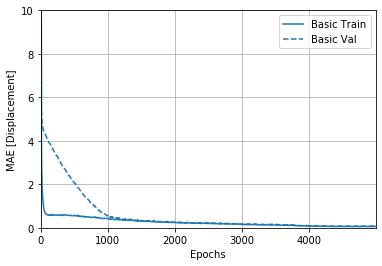

In [14]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': model_Shou_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [Displacement]')

In [15]:
plotter.plot({'Early Stopping': model_Shou_early_history}, metric = "mae")
plt.ylim([0, 1])
plt.ylabel('MAE [Displacement]')

ValueError: x and y must have same first dimension, but have shapes (14,) and (17,)

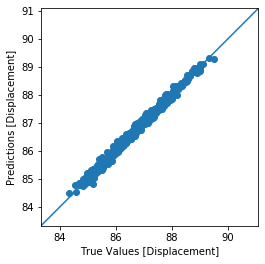

In [16]:
# model evaluate by curve
test_predictions = model_Shou.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Displacement]')
plt.ylabel('Predictions [Displacement]')
lims = [lst_min[2]-1, lst_max[2]+1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [17]:
dataset = pd.read_csv(r'F:\CON_2019_HMC_PGD-MINESET\Second_model\Case2\whe_ro_to_send\New_Testing_parameters_high_all.csv')
lst_pop = [ "Area", "Head", "Shou", "Abdo", "Pelv" ]
target = "Abdo"
for pop in lst_pop:
    if pop == target:
        print(target)
        pass
    else:
        dataset.pop(pop)

train_dataset = dataset.sample(frac=0.7)
test_dataset = dataset.drop(train_dataset.index)	

# make an instance for dataframe as "train_stats"
train_stats = train_dataset.describe()
# delete "Area" column from "train_stats"
train_stats.pop( target )

train_stats = train_stats.transpose()
# train_stats.tail()

# make instances for dataset without the QoI
train_labels = train_dataset.pop( target )
test_labels  =  test_dataset.pop( target )    

normed_train_data = norm( train_dataset )
normed_test_data  = norm( test_dataset  )

# create the model instance 
EPOCHS = 5000
model_Abdo = build_model()
model_Abdo, model_Abdo_history, model_Abdo_early_history = training(EPOCHS, model=model_Abdo)



Abdo

Epoch: 0, loss:92.8575,  mae:92.2540,  val_loss:89.0216,  val_mae:88.3975,  
....................................................................................................
Epoch: 100, loss:1.5086,  mae:0.6362,  val_loss:5.0705,  val_mae:4.1992,  
....................................................................................................
Epoch: 200, loss:1.2531,  mae:0.6009,  val_loss:4.3296,  val_mae:3.6787,  
....................................................................................................
Epoch: 300, loss:1.1709,  mae:0.6577,  val_loss:3.7660,  val_mae:3.2526,  
....................................................................................................
Epoch: 400, loss:1.0803,  mae:0.6618,  val_loss:2.9969,  val_mae:2.5783,  
....................................................................................................
Epoch: 500, loss:0.9378,  mae:0.5886,  val_loss:2.5267,  val_mae:2.1780,  
.....................................

Text(0, 0.5, 'MAE [Displacement]')

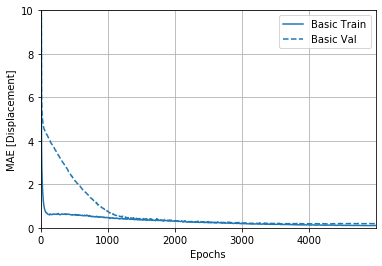

In [18]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': model_Abdo_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [Displacement]')

Text(0, 0.5, 'MAE [Displacement]')

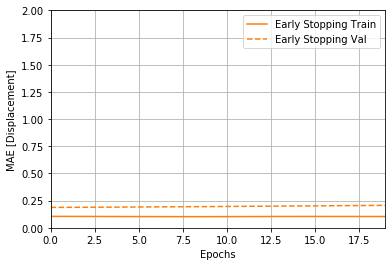

In [19]:
plotter.plot({'Early Stopping': model_Abdo_early_history}, metric = "mae")
plt.ylim([0, 2])
plt.ylabel('MAE [Displacement]')

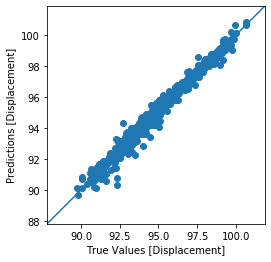

In [20]:
# model evaluate by curve
test_predictions = model_Abdo.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Displacement]')
plt.ylabel('Predictions [Displacement]')
lims = [lst_min[3]-1, lst_max[3]+1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [21]:
dataset = pd.read_csv(r'F:\CON_2019_HMC_PGD-MINESET\Second_model\Case2\whe_ro_to_send\New_Testing_parameters_high_all.csv')
lst_pop = [ "Area", "Head", "Shou", "Abdo", "Pelv" ]
target = "Pelv"
for pop in lst_pop:
    if pop == target:
        print(target)
        pass
    else:
        dataset.pop(pop)

train_dataset = dataset.sample(frac=0.7)
test_dataset = dataset.drop(train_dataset.index)	

# make an instance for dataframe as "train_stats"
train_stats = train_dataset.describe()
# delete "Area" column from "train_stats"
train_stats.pop( target )

train_stats = train_stats.transpose()
# train_stats.tail()

# make instances for dataset without the QoI
train_labels = train_dataset.pop( target )
test_labels  =  test_dataset.pop( target )    

normed_train_data = norm( train_dataset )
normed_test_data  = norm( test_dataset  )

# create the model instance 
EPOCHS = 5000
model_Pelv = build_model()
model_Pelv, model_Pelv_history, model_Pelv_early_history = training(EPOCHS, model=model_Pelv)



Pelv

Epoch: 0, loss:73.8555,  mae:73.2465,  val_loss:70.1724,  val_mae:69.5431,  
....................................................................................................
Epoch: 100, loss:1.2716,  mae:0.5257,  val_loss:4.0295,  val_mae:3.2843,  
....................................................................................................
Epoch: 200, loss:1.0918,  mae:0.5553,  val_loss:3.3677,  val_mae:2.8321,  
....................................................................................................
Epoch: 300, loss:0.9366,  mae:0.5263,  val_loss:2.7889,  val_mae:2.3795,  
....................................................................................................
Epoch: 400, loss:0.8615,  mae:0.5340,  val_loss:2.3777,  val_mae:2.0505,  
....................................................................................................
Epoch: 500, loss:0.8033,  mae:0.5354,  val_loss:2.0148,  val_mae:1.7475,  
.....................................

Text(0, 0.5, 'MAE [Displacement]')

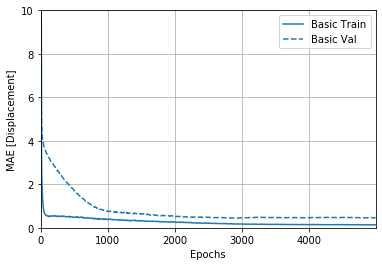

In [22]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': model_Pelv_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [Displacement]')




Text(0, 0.5, 'MAE [Displacement]')

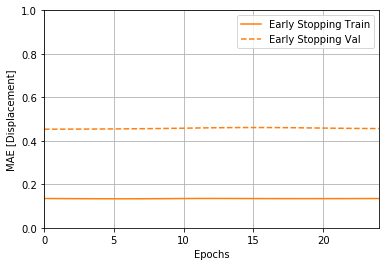

In [23]:
plotter.plot({'Early Stopping': model_Pelv_early_history}, metric = "mae")
plt.ylim([0, 1])
plt.ylabel('MAE [Displacement]')

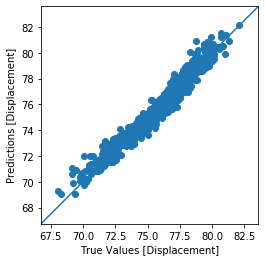

In [24]:
# model evaluate by curve
test_predictions = model_Pelv.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Displacement]')
plt.ylabel('Predictions [Displacement]')
lims = [lst_min[4]-1, lst_max[4]+1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [25]:
# model evaluate 
loss_Area, mae_Area = model_Area.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: Area {:5.2f} [mm2]".format(mae_Area))
loss_Head, mae_Head = model_Head.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: Head {:5.2f} [mm]".format(mae_Head))
loss_Shou, mae_Shou = model_Shou.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: Shou {:5.2f} [mm]".format(mae_Shou))
loss_Abdo, mae_Abdo = model_Abdo.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: Abdo {:5.2f} [mm]".format(mae_Abdo))
loss_Pelv, mae_Pelv = model_Pelv.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: Pelv {:5.2f} [mm]".format(mae_Pelv))

744/744 - 0s - loss: 959.9403 - mae: 953.0281
Testing set Mean Abs Error: Area 953.03 [mm2]
744/744 - 0s - loss: 17.1346 - mae: 17.1206
Testing set Mean Abs Error: Head 17.12 [mm]
744/744 - 0s - loss: 10.6824 - mae: 10.6736
Testing set Mean Abs Error: Shou 10.67 [mm]
744/744 - 0s - loss: 19.3338 - mae: 19.3121
Testing set Mean Abs Error: Abdo 19.31 [mm]
744/744 - 0s - loss: 0.4656 - mae: 0.4260
Testing set Mean Abs Error: Pelv  0.43 [mm]


# 2. M/L model for Pelvic displacement


# 3. Optimization by Generic Algorithm

In [26]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import Sequential, load_model
from scipy import optimize
import time


In [27]:
# Number of Curve points
point = 2375
# Number of variables 
var = 56

In [28]:
# predict_func
# Mean square error between test and prediction

def predict_func(column_names):

    for i in range( 0, len(column_names) ):
        if column_names[i] <= 515 :
            column_names[i] = 440
        elif 515 < column_names[i] <= 685:
            column_names[i] = 590
        elif 685 < column_names[i] <= 880:
            column_names[i] = 780
        elif 880 < column_names[i] <= 1080:
            column_names[i] = 980
        elif 1080 < column_names[i] <= 1290:
            column_names[i] = 1180
        elif 1290 < column_names[i] :
            column_names[i] = 1400
        

    PARTNO01 = column_names[0]
    PARTNO02 = column_names[1]
    PARTNO03 = column_names[2]
    PARTNO04 = column_names[3]
    PARTNO05 = column_names[4]
    PARTNO06 = column_names[5]
    PARTNO07 = column_names[6]
    PARTNO08 = column_names[7]
    PARTNO09 = column_names[8]
    PARTNO10 = column_names[9]

    PARTNO11 = column_names[10]
    PARTNO12 = column_names[11]
    PARTNO13 = column_names[12]
    PARTNO14 = column_names[13]
    PARTNO15 = column_names[14]
    PARTNO16 = column_names[15]
    PARTNO17 = column_names[16]
    PARTNO18 = column_names[17]
    PARTNO19 = column_names[18]
    PARTNO20 = column_names[19]

    PARTNO21 = column_names[20]
    PARTNO22 = column_names[21]
    PARTNO23 = column_names[22]
    PARTNO24 = column_names[23]
    PARTNO25 = column_names[24]
    PARTNO26 = column_names[25]
    PARTNO27 = column_names[26]
    PARTNO28 = column_names[27]
    PARTNO29 = column_names[28]
    PARTNO30 = column_names[29]

    PARTNO31 = column_names[30]
    PARTNO32 = column_names[31]
    PARTNO33 = column_names[32]
    PARTNO34 = column_names[33]
    PARTNO35 = column_names[34]
    PARTNO36 = column_names[35]
    PARTNO37 = column_names[36]
    PARTNO38 = column_names[37]
    PARTNO39 = column_names[38]
    PARTNO40 = column_names[39]

    PARTNO41 = column_names[40]
    PARTNO42 = column_names[41]
    PARTNO43 = column_names[42]
    PARTNO44 = column_names[43]
    PARTNO45 = column_names[44]

    PARTNO46 = column_names[45]
    PARTNO47 = column_names[46]
    PARTNO48 = column_names[47]
    PARTNO49 = column_names[48]
    PARTNO50 = column_names[49]

    PARTNO51 = column_names[50]
    PARTNO52 = column_names[51]
    PARTNO53 = column_names[52]
    PARTNO54 = column_names[53]
    PARTNO55 = column_names[54]
    PARTNO56 = column_names[55]

    # Prediction data standardize
    # Common variables
    PARTNO01N = norm(PARTNO01)
    PARTNO02N = norm(PARTNO02)
    PARTNO03N = norm(PARTNO03)
    PARTNO04N = norm(PARTNO04) 
    PARTNO05N = norm(PARTNO05)
    PARTNO06N = norm(PARTNO06)
    PARTNO07N = norm(PARTNO07)
    PARTNO08N = norm(PARTNO08)
    PARTNO09N = norm(PARTNO09) 
    PARTNO10N = norm(PARTNO10)

    PARTNO11N = norm(PARTNO11)
    PARTNO12N = norm(PARTNO12)
    PARTNO13N = norm(PARTNO13)
    PARTNO14N = norm(PARTNO14) 
    PARTNO15N = norm(PARTNO15)
    PARTNO16N = norm(PARTNO16)
    PARTNO17N = norm(PARTNO17)
    PARTNO18N = norm(PARTNO18)
    PARTNO19N = norm(PARTNO19) 
    PARTNO20N = norm(PARTNO20)

    PARTNO21N = norm(PARTNO21)
    PARTNO22N = norm(PARTNO22)
    PARTNO23N = norm(PARTNO23)
    PARTNO24N = norm(PARTNO24) 
    PARTNO25N = norm(PARTNO25)
    PARTNO26N = norm(PARTNO26)
    PARTNO27N = norm(PARTNO27)
    PARTNO28N = norm(PARTNO28)
    PARTNO29N = norm(PARTNO29) 
    PARTNO30N = norm(PARTNO30)

    PARTNO31N = norm(PARTNO31)
    PARTNO32N = norm(PARTNO32)
    PARTNO33N = norm(PARTNO33)
    PARTNO34N = norm(PARTNO34) 
    PARTNO35N = norm(PARTNO35)
    PARTNO36N = norm(PARTNO36)
    PARTNO37N = norm(PARTNO37)
    PARTNO38N = norm(PARTNO38)
    PARTNO39N = norm(PARTNO39) 
    PARTNO40N = norm(PARTNO40)

    PARTNO41N = norm(PARTNO41)
    PARTNO42N = norm(PARTNO42)
    PARTNO43N = norm(PARTNO43)
    PARTNO44N = norm(PARTNO44) 
    PARTNO45N = norm(PARTNO45)
    PARTNO46N = norm(PARTNO46)

    PARTNO47N = norm(PARTNO47)
    PARTNO48N = norm(PARTNO48)
    PARTNO49N = norm(PARTNO49)
    PARTNO50N = norm(PARTNO50) 
    PARTNO51N = norm(PARTNO51)
    PARTNO52N = norm(PARTNO52)
    PARTNO53N = norm(PARTNO53)
    PARTNO54N = norm(PARTNO54)
    PARTNO55N = norm(PARTNO55) 
    PARTNO56N = norm(PARTNO56)    

    # Result of prediction data   
    predict_cur_Area = model_Area.predict([[
        PARTNO01N,        PARTNO02N,        PARTNO03N,        PARTNO04N,        PARTNO05N, \
        PARTNO06N,        PARTNO07N,        PARTNO08N,        PARTNO09N,        PARTNO10N, \
        PARTNO11N,        PARTNO12N,        PARTNO13N,        PARTNO14N,        PARTNO15N, \
        PARTNO16N,        PARTNO17N,        PARTNO18N,        PARTNO19N,        PARTNO20N, \
        PARTNO21N,        PARTNO22N,        PARTNO23N,        PARTNO24N,        PARTNO25N, \
        PARTNO26N,        PARTNO27N,        PARTNO28N,        PARTNO29N,        PARTNO30N, \
        PARTNO31N,        PARTNO32N,        PARTNO33N,        PARTNO34N,        PARTNO35N, \
        PARTNO36N,        PARTNO37N,        PARTNO38N,        PARTNO39N,        PARTNO40N, \
        PARTNO41N,        PARTNO42N,        PARTNO43N,        PARTNO44N,        PARTNO45N, \
        PARTNO46N,        PARTNO47N,        PARTNO48N,        PARTNO49N,        PARTNO50N, \
        PARTNO51N,        PARTNO52N,        PARTNO53N,        PARTNO54N,        PARTNO55N, \
        PARTNO56N
        ]])[0]
    predict_cur_Head = model_Head.predict([[
        PARTNO01N,        PARTNO02N,        PARTNO03N,        PARTNO04N,        PARTNO05N, \
        PARTNO06N,        PARTNO07N,        PARTNO08N,        PARTNO09N,        PARTNO10N, \
        PARTNO11N,        PARTNO12N,        PARTNO13N,        PARTNO14N,        PARTNO15N, \
        PARTNO16N,        PARTNO17N,        PARTNO18N,        PARTNO19N,        PARTNO20N, \
        PARTNO21N,        PARTNO22N,        PARTNO23N,        PARTNO24N,        PARTNO25N, \
        PARTNO26N,        PARTNO27N,        PARTNO28N,        PARTNO29N,        PARTNO30N, \
        PARTNO31N,        PARTNO32N,        PARTNO33N,        PARTNO34N,        PARTNO35N, \
        PARTNO36N,        PARTNO37N,        PARTNO38N,        PARTNO39N,        PARTNO40N, \
        PARTNO41N,        PARTNO42N,        PARTNO43N,        PARTNO44N,        PARTNO45N, \
        PARTNO46N,        PARTNO47N,        PARTNO48N,        PARTNO49N,        PARTNO50N, \
        PARTNO51N,        PARTNO52N,        PARTNO53N,        PARTNO54N,        PARTNO55N, \
        PARTNO56N
        ]])[0]    
    predict_cur_Shou = model_Shou.predict([[
        PARTNO01N,        PARTNO02N,        PARTNO03N,        PARTNO04N,        PARTNO05N, \
        PARTNO06N,        PARTNO07N,        PARTNO08N,        PARTNO09N,        PARTNO10N, \
        PARTNO11N,        PARTNO12N,        PARTNO13N,        PARTNO14N,        PARTNO15N, \
        PARTNO16N,        PARTNO17N,        PARTNO18N,        PARTNO19N,        PARTNO20N, \
        PARTNO21N,        PARTNO22N,        PARTNO23N,        PARTNO24N,        PARTNO25N, \
        PARTNO26N,        PARTNO27N,        PARTNO28N,        PARTNO29N,        PARTNO30N, \
        PARTNO31N,        PARTNO32N,        PARTNO33N,        PARTNO34N,        PARTNO35N, \
        PARTNO36N,        PARTNO37N,        PARTNO38N,        PARTNO39N,        PARTNO40N, \
        PARTNO41N,        PARTNO42N,        PARTNO43N,        PARTNO44N,        PARTNO45N, \
        PARTNO46N,        PARTNO47N,        PARTNO48N,        PARTNO49N,        PARTNO50N, \
        PARTNO51N,        PARTNO52N,        PARTNO53N,        PARTNO54N,        PARTNO55N, \
        PARTNO56N
        ]])[0]    
    predict_cur_Abdo = model_Abdo.predict([[
        PARTNO01N,        PARTNO02N,        PARTNO03N,        PARTNO04N,        PARTNO05N, \
        PARTNO06N,        PARTNO07N,        PARTNO08N,        PARTNO09N,        PARTNO10N, \
        PARTNO11N,        PARTNO12N,        PARTNO13N,        PARTNO14N,        PARTNO15N, \
        PARTNO16N,        PARTNO17N,        PARTNO18N,        PARTNO19N,        PARTNO20N, \
        PARTNO21N,        PARTNO22N,        PARTNO23N,        PARTNO24N,        PARTNO25N, \
        PARTNO26N,        PARTNO27N,        PARTNO28N,        PARTNO29N,        PARTNO30N, \
        PARTNO31N,        PARTNO32N,        PARTNO33N,        PARTNO34N,        PARTNO35N, \
        PARTNO36N,        PARTNO37N,        PARTNO38N,        PARTNO39N,        PARTNO40N, \
        PARTNO41N,        PARTNO42N,        PARTNO43N,        PARTNO44N,        PARTNO45N, \
        PARTNO46N,        PARTNO47N,        PARTNO48N,        PARTNO49N,        PARTNO50N, \
        PARTNO51N,        PARTNO52N,        PARTNO53N,        PARTNO54N,        PARTNO55N, \
        PARTNO56N
        ]])[0]                            
    predict_cur_Pelv = model_Pelv.predict([[
        PARTNO01N,        PARTNO02N,        PARTNO03N,        PARTNO04N,        PARTNO05N, \
        PARTNO06N,        PARTNO07N,        PARTNO08N,        PARTNO09N,        PARTNO10N, \
        PARTNO11N,        PARTNO12N,        PARTNO13N,        PARTNO14N,        PARTNO15N, \
        PARTNO16N,        PARTNO17N,        PARTNO18N,        PARTNO19N,        PARTNO20N, \
        PARTNO21N,        PARTNO22N,        PARTNO23N,        PARTNO24N,        PARTNO25N, \
        PARTNO26N,        PARTNO27N,        PARTNO28N,        PARTNO29N,        PARTNO30N, \
        PARTNO31N,        PARTNO32N,        PARTNO33N,        PARTNO34N,        PARTNO35N, \
        PARTNO36N,        PARTNO37N,        PARTNO38N,        PARTNO39N,        PARTNO40N, \
        PARTNO41N,        PARTNO42N,        PARTNO43N,        PARTNO44N,        PARTNO45N, \
        PARTNO46N,        PARTNO47N,        PARTNO48N,        PARTNO49N,        PARTNO50N, \
        PARTNO51N,        PARTNO52N,        PARTNO53N,        PARTNO54N,        PARTNO55N, \
        PARTNO56N
        ]])[0]        
 
    
    lst_max = (dataset.max(0).tail(5))
    lst_min = (dataset.min(0).tail(5))

    min_Area = lst_min[0]
    max_Area = lst_max[0]

    min_Head = lst_min[1] 
    max_Head = lst_max[1]

    min_Shou = lst_min[2]
    max_Shou = lst_max[2]

    min_Abdo = lst_min[3]
    max_Abdo = lst_max[3]

    min_Pelv = lst_min[4]
    max_Pelv = lst_max[4]

    norm_Area = (predict_cur_Area - min_Area)/(max_Area - min_Area)
    norm_Head = (predict_cur_Head - min_Head)/(max_Head - min_Head)
    norm_Shou = (predict_cur_Shou - min_Shou)/(max_Shou - min_Shou)
    norm_Abdo = (predict_cur_Abdo - min_Abdo)/(max_Abdo - min_Abdo)
    norm_Pelv = (predict_cur_Pelv - min_Pelv)/(max_Pelv - min_Pelv)
    # print(predict_cur_Area, predict_cur_Pelvic)

    weight1 = 0.2
    weight2 = 0.2
    weight3 = 0.2
    weight4 = 0.2
    weight5 = 0.2

    return   weight1 * norm_Area + weight2 * norm_Head + weight3 * norm_Shou + weight4 * norm_Abdo + weight5 * norm_Pelv


In [29]:
# bnds; doundary conditions
# Parameter of Boundary conditions
bnds = [( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ),                       
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ),
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ),
        ( 440, 1400 )
]
print(len(bnds))

56


In [30]:
from scipy import optimize
# best1bin
result_best1bin = optimize.differential_evolution(predict_func, bnds, strategy='best1bin', init='latinhypercube')



In [31]:
# Get minimize parameters
minimum_best1bin_x = result_best1bin.x
minimum_best1bin_f = result_best1bin.fun
minimum_best1bin_x, minimum_best1bin_f

(array([ 833.74020951,  911.26322578,  988.9570354 , 1217.90017386,
         780.88289922,  947.42143615,  954.49187655, 1174.85909586,
        1024.54535861,  996.23728834, 1314.76980046,  998.36063058,
        1036.26255957, 1218.27834215,  715.38840192, 1096.28795088,
         804.09943655, 1288.27301631,  642.32324329,  778.32690123,
         773.63126308,  491.55323855, 1092.7099572 , 1190.26214823,
         864.31292724,  976.58740094,  850.55077152,  892.24012175,
         894.50958153,  829.45265825,  776.1965614 ,  552.89473643,
        1188.26577989, 1051.84774141, 1108.99524829, 1032.58468147,
         662.13227195, 1039.58764943,  946.29652066, 1294.58626497,
        1038.41423913,  627.75809301,  997.95181133, 1020.42418477,
        1005.53932593,  814.13053665, 1185.43731463, 1023.01876486,
        1212.70142324,  837.51464716,  694.34549642,  778.95721067,
         737.78982092, 1197.8888113 ,  922.43122039, 1267.09496381]),
 -0.4128377437591553)

In [32]:
for i in range( 0, len(minimum_best1bin_x) ):
    if minimum_best1bin_x[i] <= 515 :
        minimum_best1bin_x[i] = 440
    elif 515 < minimum_best1bin_x[i] <= 685:
        minimum_best1bin_x[i] = 590
    elif 685 < minimum_best1bin_x[i] <= 880:
        minimum_best1bin_x[i] = 780
    elif 880 < minimum_best1bin_x[i] <= 1080:
        minimum_best1bin_x[i] = 980
    elif 1080 < minimum_best1bin_x[i] <= 1290:
        minimum_best1bin_x[i] = 1180
    elif 1290 < minimum_best1bin_x[i] :
        minimum_best1bin_x[i] = 1400
minimum_best1bin_x        

array([ 780.,  980.,  980., 1180.,  780.,  980.,  980., 1180.,  980.,
        980., 1400.,  980.,  980., 1180.,  780., 1180.,  780., 1180.,
        590.,  780.,  780.,  440., 1180., 1180.,  780.,  980.,  780.,
        980.,  980.,  780.,  780.,  590., 1180.,  980., 1180.,  980.,
        590.,  980.,  980., 1400.,  980.,  590.,  980.,  980.,  980.,
        780., 1180.,  980., 1180.,  780.,  780.,  780.,  780., 1180.,
        980., 1180.])

In [33]:
for i in range( 0, len(minimum_best1bin_x) ):
    if minimum_best1bin_x[i] <= 515 : 
        minimum_best1bin_x[i] = 11380000
    elif 515 < minimum_best1bin_x[i] <= 685:
        minimum_best1bin_x[i] = 11130000
    elif 685 < minimum_best1bin_x[i] <= 880:
        minimum_best1bin_x[i] = 11160000
    elif 880 < minimum_best1bin_x[i] <= 1080:
        minimum_best1bin_x[i] = 11190000
    elif 1080 < minimum_best1bin_x[i] <= 1290:
        minimum_best1bin_x[i] = 11210000
    elif 1290 < minimum_best1bin_x[i] :
        minimum_best1bin_x[i] = 60101030
minimum_best1bin_x        

array([11160000., 11190000., 11190000., 11210000., 11160000., 11190000.,
       11190000., 11210000., 11190000., 11190000., 60101030., 11190000.,
       11190000., 11210000., 11160000., 11210000., 11160000., 11210000.,
       11130000., 11160000., 11160000., 11380000., 11210000., 11210000.,
       11160000., 11190000., 11160000., 11190000., 11190000., 11160000.,
       11160000., 11130000., 11210000., 11190000., 11210000., 11190000.,
       11130000., 11190000., 11190000., 60101030., 11190000., 11130000.,
       11190000., 11190000., 11190000., 11160000., 11210000., 11190000.,
       11210000., 11160000., 11160000., 11160000., 11160000., 11210000.,
       11190000., 11210000.])